<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammad Taher Abadi

**Student ID**: 99101032


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

<font color='green'>Write down your answers as markdown here.</font>

## Theoretical Questions

### 1. Derive the dual optimization problem for the Soft-Margin SVM

To derive the dual optimization problem, we start with the primal optimization problem for the Soft-Margin SVM:

**Primal Optimization Problem:**
Minimize:  
(1/2) * ||w||^2 + C * sum(xi_i) for i = 1, ..., N

Subject to:  
y_i * (w^T * x_i + b) >= 1 - xi_i for i = 1, ..., N  
xi_i >= 0 for i = 1, ..., N

To derive the dual problem, we introduce Lagrange multipliers alpha_i >= 0 for the constraints y_i * (w^T * x_i + b) >= 1 - xi_i and mu_i >= 0 for the constraints xi_i >= 0. The Lagrangian is:

L(w, b, xi, alpha, mu) = (1/2) * ||w||^2 + C * sum(xi_i) - sum(alpha_i * (y_i * (w^T * x_i + b) - 1 + xi_i)) - sum(mu_i * xi_i)

To find the dual, we need to minimize the Lagrangian with respect to the primal variables w, b, and xi. Setting the derivatives of L with respect to w, b, and xi to zero, we get:

partial L / partial w = w - sum(alpha_i * y_i * x_i) = 0 implies w = sum(alpha_i * y_i * x_i)  
partial L / partial b = -sum(alpha_i * y_i) = 0 implies sum(alpha_i * y_i) = 0  
partial L / partial xi_i = C - alpha_i - mu_i = 0 implies alpha_i <= C

Substituting these back into the Lagrangian, we obtain the dual problem:

**Dual Optimization Problem:**
Maximize:  
sum(alpha_i) - (1/2) * sum(sum(alpha_i * alpha_j * y_i * y_j * x_i^T * x_j))

Subject to:  
0 <= alpha_i <= C, sum(alpha_i * y_i) = 0

### 2. How do we calculate the weights and bias (w and b) using the dual problem optimum points?

Once we have the optimal alpha_i from solving the dual problem, the weight vector w can be calculated as:

w = sum(alpha_i * y_i * x_i)

The bias term b can be computed using any support vector (x_i, y_i) for which 0 < alpha_i < C:

b = y_i - w^T * x_i

### 3. How do we classify new data points using the optimal weights and bias?

For a new data point x, the classification is done by evaluating the sign of the decision function:

f(x) = w^T * x + b

The predicted class label y_hat is given by:

y_hat = sign(f(x))

## Kernel Trick

When the data is not linearly separable, we use the Kernel trick to map the input features into a higher-dimensional space where a linear separation is possible.

A kernel function K(x, z) computes the inner product in the transformed feature space without explicitly performing the transformation phi(x). Common kernel functions include:

- Polynomial Kernel: K(x, z) = (x^T z + c)^d
- Gaussian (RBF) Kernel: K(x, z) = exp(-||x - z||^2 / (2 * sigma^2))

Using the kernel trick, the SVM optimization problem is solved in the higher-dimensional space efficiently.
s label y_hat is given by:

y_hat = sign(f(x))
l y_hat is given by:

y_hat = sign(f(x))
\[ \hat{y} = \text{sign}(f(\mathbf{x})) \]
\[ \hat{y} = \text{sign}(f(\mathbf{x})) \]
\[ \hat{y} = \text{sign}(f(\mathbf{x})) \]
\[ \hat{y} = \text{sign}(f(\mathbf{x})) \]
tax

Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [2]:
import pandas as pd

df1 = pd.read_csv('F:/Term8/ML/HWs/CHW4/Q3/DF1.csv')
df2 = pd.read_csv('F:/Term8/ML/HWs/CHW4/Q3/DF2.csv')
df3 = pd.read_csv('F:/Term8/ML/HWs/CHW4/Q3/DF3.csv')

print("First 5 rows of DF1:")
print(df1.head())

print("\nFirst 5 rows of DF2:")
print(df2.head())

print("\nFirst 5 rows of DF3:")
print(df3.head())



First 5 rows of DF1:
         x1        x2  y
0  6.462652  5.121478 -1
1 -6.586541 -7.721287  1
2  9.239683 -8.595738 -1
3  4.250052  2.143755  1
4  8.219779 -3.609733 -1

First 5 rows of DF2:
         x1         x2  y
0  2.937145  77.102291  1
1 -0.029344  44.802353  1
2  5.868818  44.595757 -1
3  8.609281  49.223945 -1
4  7.763276 -14.340750 -1

First 5 rows of DF3:
         x1        x2  y
0 -0.517768 -0.466158 -1
1  0.940985  0.235175  1
2 -0.470720  0.917120  1
3  0.712716 -0.097401 -1
4 -0.608773 -0.107034 -1


Use the following function to visualize the datapoints for all datasets.

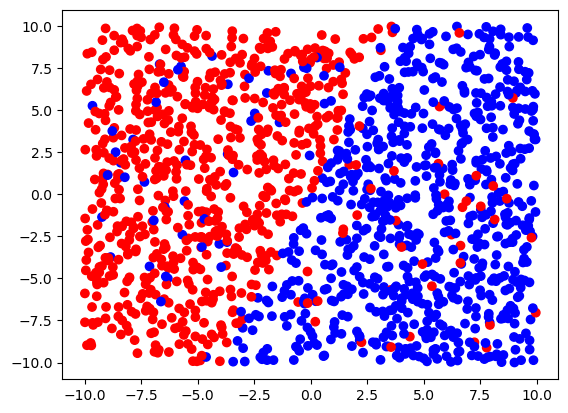

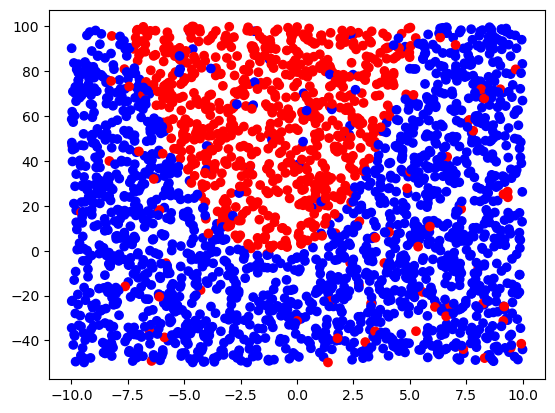

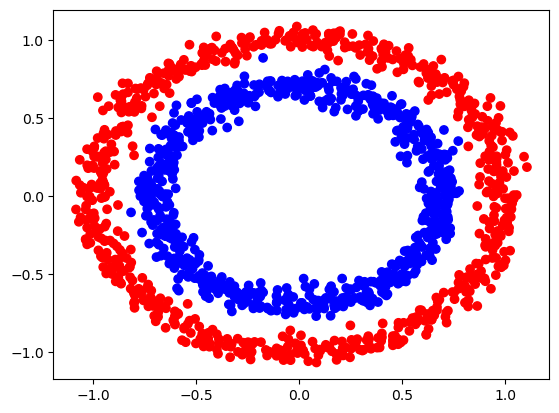

In [4]:
import matplotlib.pyplot as plt

def visualize_data(X, y):
    col = []
    for i in range(len(y)):
        if y[i] == 1:
            col.append('red')
        else:
            col.append('blue')
    plt.scatter(X[:, 0], X[:, 1], color=col)
    plt.show()

X_df1 = df1.iloc[:, :-1].values
y_df1 = df1.iloc[:, -1].values
visualize_data(X_df1, y_df1)

X_df2 = df2.iloc[:, :-1].values
y_df2 = df2.iloc[:, -1].values
visualize_data(X_df2, y_df2)

X_df3 = df3.iloc[:, :-1].values
y_df3 = df3.iloc[:, -1].values
visualize_data(X_df3, y_df3)


**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

<font color='green'>Write down your answers as markdown here.</font>

Dataset 1: We can observe that the data points are linearly separable. Therefore, the Linear Kernel is the most appropriate choice for this dataset.

Dataset 2: We can observe that the data points are not linearly separable. However, they might be separable using a polynomial boundary. Therefore, the Polynomial Kernel of degree 2 is the most appropriate choice for this dataset.

Dataset 3: It is evident that the data points are arranged in concentric circles, which are not linearly separable and might not be well-separated by a polynomial kernel. The Radial Basis Function (RBF) Kernel, which is well-suited for such patterns, is the most appropriate choice for this dataset.

## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df1 = pd.read_csv('F:/Term8/ML/HWs/CHW4/Q3/DF1.csv')
X_df1 = df1.iloc[:, :-1].values
y_df1 = df1.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [20]:
import numpy as np

def linear_kernel(x, z):
    return np.dot(x, z)

def compute_kernel_matrix(X, kernel_function):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X[i], X[j])
    return K

def svm_train(X, y, C, kernel_function, max_iter=1000, tol=1e-5, lr=1e-3):
    n_samples, n_features = X.shape
    alpha = np.zeros(n_samples)
    K = compute_kernel_matrix(X, kernel_function)
    
    for iteration in range(max_iter):
        for i in range(n_samples):
            gradient = 1 - y[i] * np.sum(alpha * y * K[:, i])
            alpha[i] += lr * gradient
            alpha[i] = max(0, min(C, alpha[i]))
        
        dual_obj = np.sum(alpha) - 0.5 * np.sum((alpha * y)[:, None] * (alpha * y)[None, :] * K)
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Dual Objective: {dual_obj}")
        
        if np.abs(gradient) < tol:
            break
    
    support_vectors = alpha > 1e-5
    w = np.sum((alpha * y)[:, None] * X, axis=0)
    b = np.mean(y[support_vectors] - np.dot(X[support_vectors], w))
    return alpha, w, b

C = 1.0
alpha_opt, w, b = svm_train(X_train, y_train, C, linear_kernel)


Iteration 0, Dual Objective: 0.7601435901982816
Iteration 100, Dual Objective: 49.74222533883902
Iteration 200, Dual Objective: 98.608827079108
Iteration 300, Dual Objective: 147.4753025434672
Iteration 400, Dual Objective: 195.99835325716157
Iteration 500, Dual Objective: 236.49015045315033
Iteration 600, Dual Objective: 265.1563842957841
Iteration 700, Dual Objective: 285.7082089281483
Iteration 800, Dual Objective: 303.15211402275344
Iteration 900, Dual Objective: 317.49703184490653


Predict the class of each entry in the test set using your learned model.

In [23]:
def classify(X, w, b):
    return np.sign(np.dot(X, w) + b)

y_pred = classify(X_test, w, b)


Use classification_report function (from sklearn) to get the accuracy of your model.

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       148
           1       0.91      0.93      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('F:/Term8/ML/HWs/CHW4/Q3/DF2.csv')
X_df2 = df2.iloc[:, :-1].values
y_df2 = df2.iloc[:, -1].values

X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state=42)

scaler_df2 = StandardScaler()
X_train_df2 = scaler_df2.fit_transform(X_train_df2)
X_test_df2 = scaler_df2.transform(X_test_df2)



Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [28]:
import numpy as np

def polynomial_kernel(x, z, degree=2):
    return (1 + np.dot(x, z)) ** degree

def compute_kernel_matrix(X, kernel_function):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X[i], X[j])
    return K

def svm_train_smo(X, y, C, kernel_function, tol=1e-3, max_passes=5):
    n_samples, n_features = X.shape
    alpha = np.zeros(n_samples)
    b = 0
    passes = 0
    
    K = compute_kernel_matrix(X, kernel_function)
    
    def E(i):
        return b + np.sum(alpha * y * K[:, i]) - y[i]
    
    while passes < max_passes:
        num_changed_alphas = 0
        for i in range(n_samples):
            E_i = E(i)
            if (y[i] * E_i < -tol and alpha[i] < C) or (y[i] * E_i > tol and alpha[i] > 0):
                j = np.random.randint(0, n_samples - 1)
                while j == i:
                    j = np.random.randint(0, n_samples - 1)
                E_j = E(j)
                
                alpha_i_old = alpha[i]
                alpha_j_old = alpha[j]
                
                if y[i] == y[j]:
                    L = max(0, alpha[j] + alpha[i] - C)
                    H = min(C, alpha[j] + alpha[i])
                else:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(C, C + alpha[j] - alpha[i])
                
                if L == H:
                    continue
                
                eta = 2 * K[i, j] - K[i, i] - K[j, j]
                if eta >= 0:
                    continue
                
                alpha[j] -= y[j] * (E_i - E_j) / eta
                alpha[j] = max(L, min(H, alpha[j]))
                
                if abs(alpha[j] - alpha_j_old) < tol:
                    alpha[j] = alpha_j_old
                    continue
                
                alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])
                
                b1 = b - E_i - y[i] * (alpha[i] - alpha_i_old) * K[i, i] - y[j] * (alpha[j] - alpha_j_old) * K[i, j]
                b2 = b - E_j - y[i] * (alpha[i] - alpha_i_old) * K[i, j] - y[j] * (alpha[j] - alpha_j_old) * K[j, j]
                
                if 0 < alpha[i] < C:
                    b = b1
                elif 0 < alpha[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2
                
                num_changed_alphas += 1
        
        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0
    
    w = np.sum((alpha * y)[:, None] * X, axis=0)
    return alpha, w, b

C = 1.0
alpha_opt_df2, w_df2, b_df2 = svm_train_smo(X_train_df2, y_train_df2, C, polynomial_kernel)


Predict the class of each entry in the test set using your learned model.

In [29]:
def classify(X, w, b):
    return np.sign(np.dot(X, w) + b)

y_pred_df2 = classify(X_test_df2, w_df2, b_df2)



Use classification_report function (from sklearn) to get the accuracy of your model.

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test_df2, y_pred_df2))



              precision    recall  f1-score   support

          -1       0.91      0.23      0.37       336
           1       0.37      0.95      0.53       160

    accuracy                           0.46       496
   macro avg       0.64      0.59      0.45       496
weighted avg       0.73      0.46      0.42       496



## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df3 = pd.read_csv('F:/Term8/ML/HWs/CHW4/Q3/DF3.csv')
X_df3 = df3.iloc[:, :-1].values
y_df3 = df3.iloc[:, -1].values

X_train_df3, X_test_df3, y_train_df3, y_test_df3 = train_test_split(X_df3, y_df3, test_size=0.2, random_state=42)

scaler_df3 = StandardScaler()
X_train_df3 = scaler_df3.fit_transform(X_train_df3)
X_test_df3 = scaler_df3.transform(X_test_df3)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [35]:
def rbf_kernel(x, z, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x - z) ** 2)

def compute_kernel_matrix(X, kernel_function):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_function(X[i], X[j])
    return K

def svm_train_smo(X, y, C, kernel_function, tol=1e-3, max_passes=5):
    n_samples, n_features = X.shape
    alpha = np.zeros(n_samples)
    b = 0
    passes = 0
    
    K = compute_kernel_matrix(X, kernel_function)
    
    def E(i):
        return b + np.sum(alpha * y * K[:, i]) - y[i]
    
    while passes < max_passes:
        num_changed_alphas = 0
        for i in range(n_samples):
            E_i = E(i)
            if (y[i] * E_i < -tol and alpha[i] < C) or (y[i] * E_i > tol and alpha[i] > 0):
                j = np.random.randint(0, n_samples - 1)
                while j == i:
                    j = np.random.randint(0, n_samples - 1)
                E_j = E(j)
                
                alpha_i_old = alpha[i]
                alpha_j_old = alpha[j]
                
                if y[i] == y[j]:
                    L = max(0, alpha[j] + alpha[i] - C)
                    H = min(C, alpha[j] + alpha[i])
                else:
                    L = max(0, alpha[j] - alpha[i])
                    H = min(C, C + alpha[j] - alpha[i])
                
                if L == H:
                    continue
                
                eta = 2 * K[i, j] - K[i, i] - K[j, j]
                if eta >= 0:
                    continue
                
                alpha[j] -= y[j] * (E_i - E_j) / eta
                alpha[j] = max(L, min(H, alpha[j]))
                
                if abs(alpha[j] - alpha_j_old) < tol:
                    alpha[j] = alpha_j_old
                    continue
                
                alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])
                
                b1 = b - E_i - y[i] * (alpha[i] - alpha_i_old) * K[i, i] - y[j] * (alpha[j] - alpha_j_old) * K[i, j]
                b2 = b - E_j - y[i] * (alpha[i] - alpha_i_old) * K[i, j] - y[j] * (alpha[j] - alpha_j_old) * K[j, j]
                
                if 0 < alpha[i] < C:
                    b = b1
                elif 0 < alpha[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2
                
                num_changed_alphas += 1
        
        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0
    
    w = np.sum((alpha * y)[:, None] * X, axis=0)
    return alpha, w, b

C = 1.0
alpha_opt_df3, w_df3, b_df3 = svm_train_smo(X_train_df3, y_train_df3, C, rbf_kernel)


Predict the class of each entry in the test set using your learned model.

In [36]:
def classify(X, alpha, y, b, kernel_function, X_train):
    y_pred = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        s = b
        for alpha_j, y_j, x_j in zip(alpha, y, X_train):
            s += alpha_j * y_j * kernel_function(X[i], x_j)
        y_pred[i] = np.sign(s)
    return y_pred

y_pred_df3 = classify(X_test_df3, alpha_opt_df3, y_train_df3, b_df3, rbf_kernel, X_train_df3)


Use classification_report function (from sklearn) to get the accuracy of your model.

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test_df3, y_pred_df3, zero_division=1))


              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

